# Attribute Information
preg: Number of time pregnant
plas: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
pres: Diastolic blood pressure (mm Hg)
skin: Triceps skin fold thickness (mm)
test: 2-Hour serum insulin (mu U/ml)
mass: Body mass index (weight in kg/(height in m)^2)
pedi: Diabetes pedigree function
age: Age (years)
class: Class variable (0 or 1)

# Agenda
Import the libraries	
Get the data
Indexing the attributes of the dataset as X and Y variable.
Split the data into train and test set
Build the model using Gaussian Naive bayes.
And validated it on test set.
Calculate the accuracy using Confusion Matrix.


In [13]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load data in Pandas dataframe
pima_df = pd.read_csv("pima-indians-diabetes.csv")

#Review data
pima_df.head(5)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


This dataset contains 8 predictors and one target variable (Outcome). 
All values are numerical. 
Target variable value is categorical as its either 0 or 1 (Healthy or Diabetic).
This survey was coducted on total 768 females.

In [6]:
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Observations:
1. By reviewing the above data we can see that min value for plas (Plasma glucose), pres (BloodPressure), skin (SkinThickness),test (Insulin) and mass (BMI) are 0. These values cant be zero in real world and seems to be error in data collection or data recording.
2. This data is collected for females between the age group 21-81 years. Avg pregnancies are approximately 4. Min is 0 and max no. of pregnancies in the data set are 17. So this has long tail on right side.

Pregnancies
Min = 0 Q1 = 1 Median = 3 Q3 = 6 Max = 17 
IQR = Q3 - Q1 = 6 - 1 = 5
Q3 + 1.5 (IQR) = 6 + 1.5 * 5 = 6 + 7.5 = 13.5 

Age 
Min = 21 Q1 = 24 Median = 33 Q3 = 41 Max = 81 
IQR = Q3 - Q1 = 41 - 24 = 17
Q3 + 1.5 (IQR) = 41 + 1.5 * 17 = 66.5

So seems that we have outlier in our data set for Pregnancies/Age but we will verify this in our further anlaysis.

a. For all the predictors, the mean is greater than the median.
b. This means that the tail of the distribution is longer on the right hand side than on the left hand side

In [8]:
# Check if any null values.
pima_df.isnull().values.any()

False

No null values in the dataset but we have zero values for few predictors which are error in the data as mentioned above.

In [9]:
pima_df.groupby(["class"]).count()

,Preg,Plas,Pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


So the ratio is approximately 2:1 (Non-Diabetic : Diabetic) data in above sample.
If we take probability of Non-Diabetic is 500/768 = 65%, it means we can classify new data as non-diabetic with 65% accuracy without any algorithm.



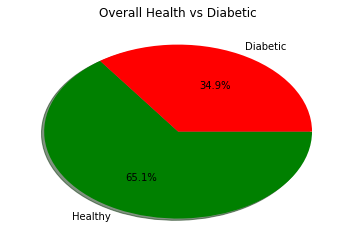

In [14]:
#overall 500 healthy and 268 are diabetic
# Lets plot the pie chart to find out the percent of Healthy and Diabetic in our dataset
colors = ['g', 'r']
labels = ['Healthy', 'Diabetic']
Total = pima_df['class'].groupby(by=pima_df['class']).value_counts()
plt.pie(Total, colors=colors, labels=labels, explode=None, autopct='%1.1f%%',counterclock=False, shadow=True)
plt.title('Overall Health vs Diabetic')
plt.show()

c:\programdata\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


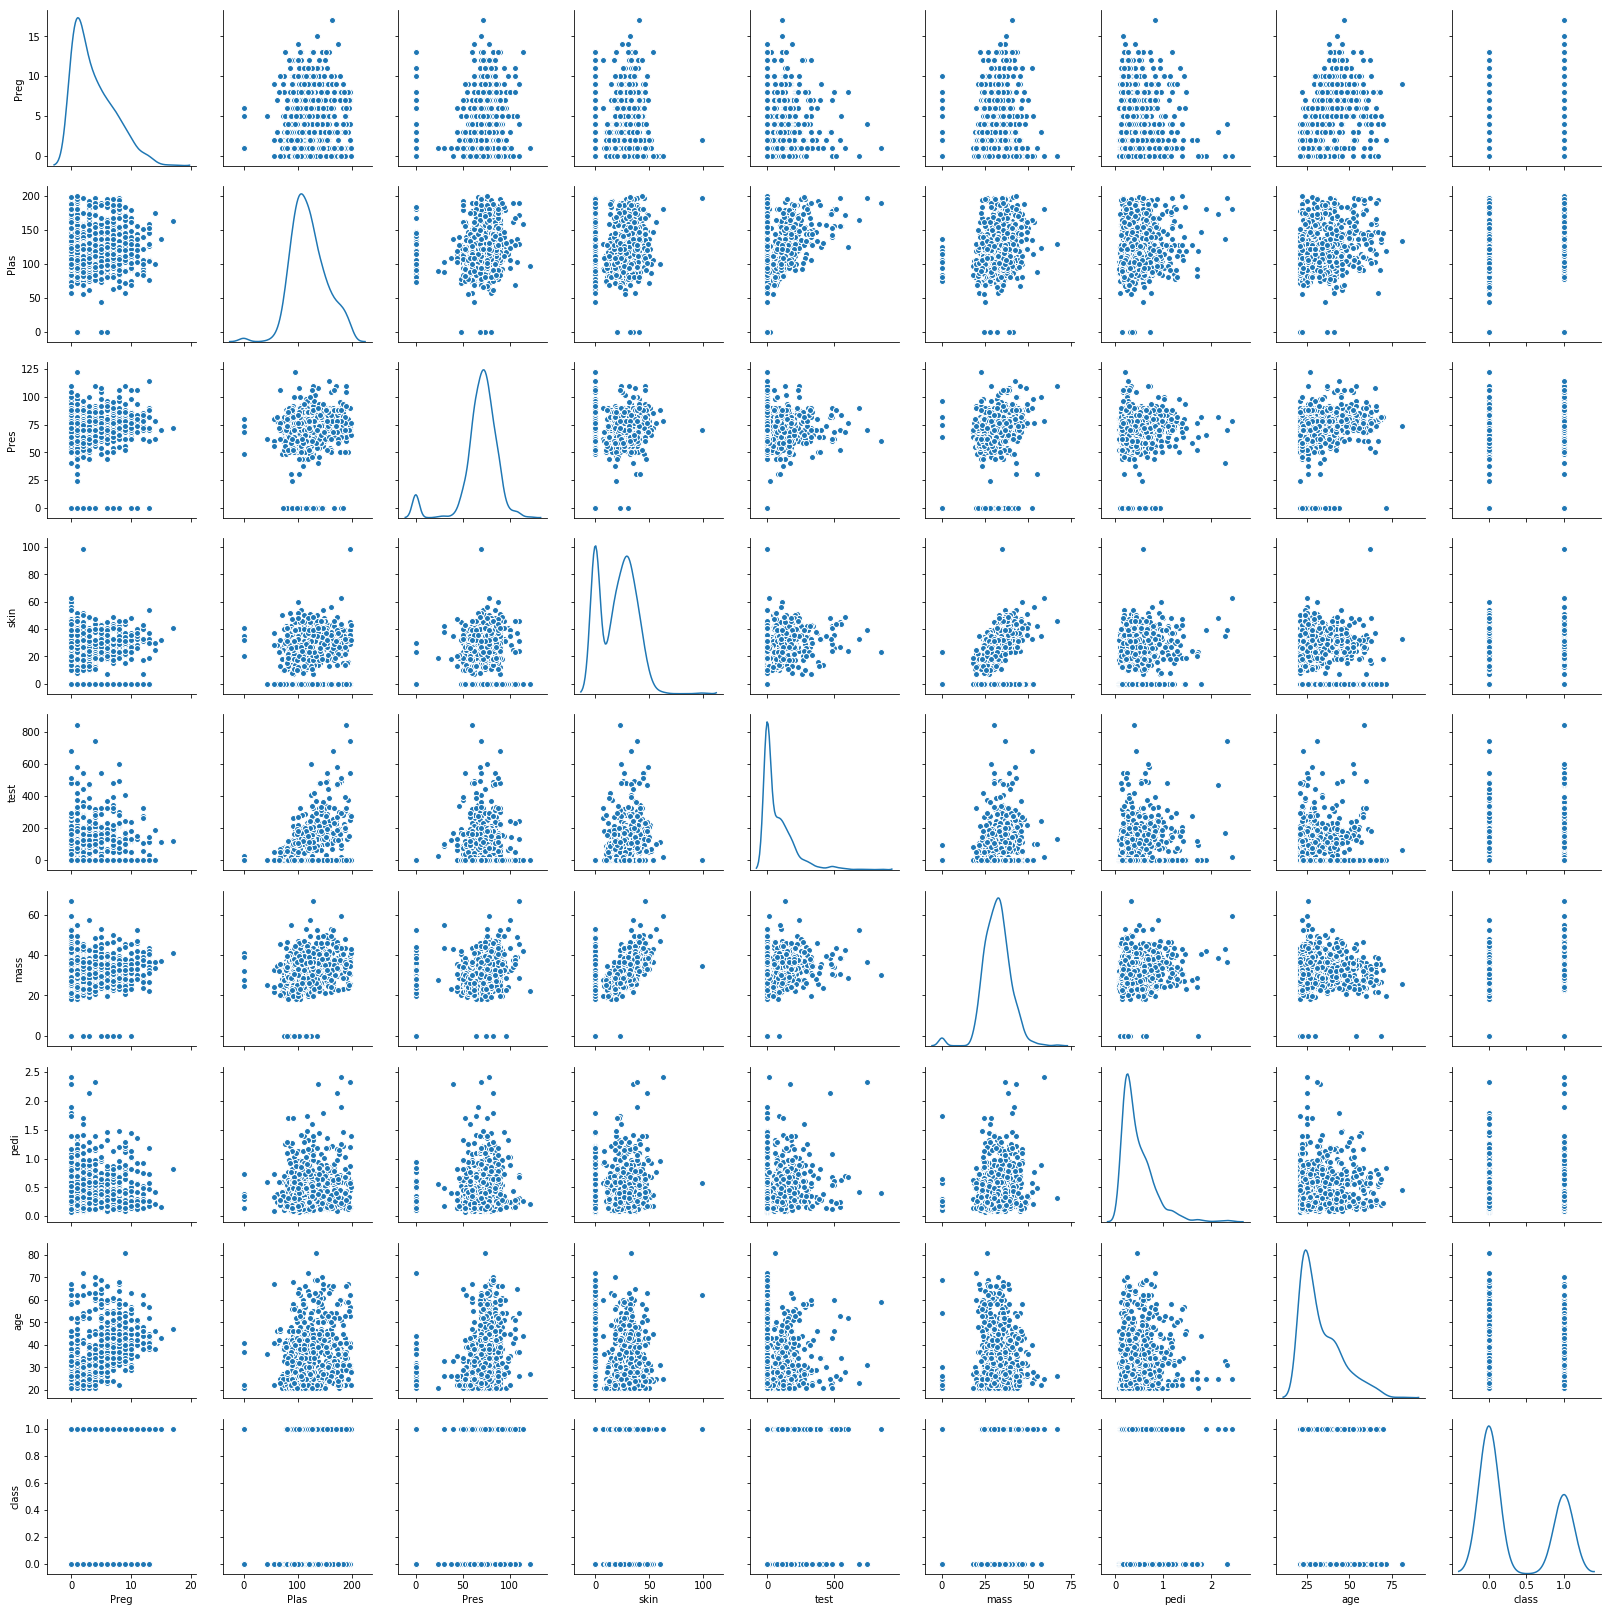

In [10]:
# Pairplot using sns

sns.pairplot(pima_df, diag_kind='kde')

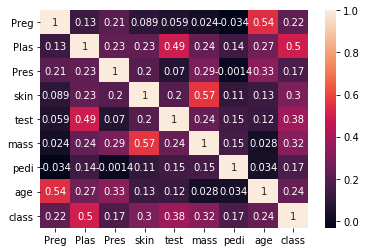

In [40]:
#Check the co-relation between different predictors
corr = pima_df.corr()
sns.heatmap(corr,annot=True,)

# Observations
1. mass, pres, plas looks to be normally distributed and have missing values (Zero)
2. mass is correlated with skinthickness. 

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [17]:
# split data in features and target

array = pima_df.values
X = pima_df.iloc[:,0:8]
y = pima_df.iloc[:,8]

In [18]:
# split data in test and trianing set

test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [30]:
#---------------------------- Iteration 1 --------------------------------------

#Build the model using Gaussian Naive bayes.
model = GaussianNB()
model.fit(X_train, y_train)

#validate on test set.
predicted = model.predict(X_test)

In [25]:
#Accuracy score
score = metrics.accuracy_score(y_test, predicted,normalize=True, sample_weight=None)
print("Accuracy score : {0} %".format(round(score*100,3)))

Accuracy score : 78.355 %


In [28]:
#Calculate the accuracy using Confusion Matrix.
print(metrics.confusion_matrix(y_test, predicted))

[[128  18]
 [ 32  53]]


In [29]:
print(metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       0.80      0.88      0.84       146
          1       0.75      0.62      0.68        85

avg / total       0.78      0.78      0.78       231



In our sample we have missing values that we need to handle.

# Missing Value or Zero values

In our dataset we dont have direct missing value or NaN but few predictors ('plas','pres','skin','test','mass') have zero value. These values shouldnt be zero in real world and hence we are treating them as missing values.

First, we will find out the total count and percentage of missing values and then we are going to replace zero with NaN so that we can use functions available in Pandas to handle them.

In [33]:
import numpy as np
pima_df[['Plas','Pres','skin','test','mass']] = pima_df[['Plas','Pres','skin','test','mass']].replace(0,np.NaN)

missing_values = pd.DataFrame(pima_df.isnull().sum(), columns = ['MissingValueCount'])
missing_values['MissingValuePercent'] = ((pima_df.isnull().sum())/len(pima_df['class'])*100).round(2)

In [34]:
print(missing_values)

       MissingValueCount  MissingValuePercent
Preg                   0                 0.00
Plas                   5                 0.65
Pres                  35                 4.56
skin                 227                29.56
test                 374                48.70
mass                  11                 1.43
pedi                   0                 0.00
age                    0                 0.00
class                  0                 0.00



As can be seen from above table, skin and test have majority of the missing values (30% and 49%) and others are less than 5%. If we decide to drop the missing values, it will reduce our dataset size by almost 50%. 
We will replace missing values by central value (median) for column by our target variable (healthy and diabetic median) and will perform further analysis.

In [35]:
#Handling null values by replacing healthy and diabetic median values for each column

col = ['Plas', 'Pres', 'skin', 'test','mass']

for i in col:
    temp = pima_df[pima_df[i].notnull()]
    temp = temp[[i, 'class']].groupby(['class'])[[i]].median().reset_index()
    out_zero = temp[temp['class']==0][i].values
    out_one = temp[temp['class']==1][i].values
    pima_df.loc[(pima_df['class'] == 0 ) & (pima_df[i].isnull()), i] = out_zero
    pima_df.loc[(pima_df['class'] == 1 ) & (pima_df[i].isnull()), i] = out_one

In [36]:
pima_df.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [37]:
#---------------------------- Iteration 2 --------------------------------------

# split data in features and target

array = pima_df.values
X = pima_df.iloc[:,0:8]
y = pima_df.iloc[:,8]

# split data in test and trianing set

test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

#Build the model using Gaussian Naive bayes.
model = GaussianNB()
model.fit(X_train, y_train)

#validate on test set.
predicted = model.predict(X_test)

#Accuracy score
score = metrics.accuracy_score(y_test, predicted,normalize=True, sample_weight=None)
print("Accuracy score : {0} %".format(round(score*100,3)))

Accuracy score : 80.087 %


In [38]:
#Calculate the accuracy using Confusion Matrix.
print(metrics.confusion_matrix(y_test, predicted))

[[126  20]
 [ 26  59]]


In [39]:
print(metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       0.83      0.86      0.85       146
          1       0.75      0.69      0.72        85

avg / total       0.80      0.80      0.80       231



#---------------------------- Iteration 3 --------------------------------------

mass is correlated with skin. So we will drop one of the column and then calculate the accuracy score to check if any changes.

In [47]:
#---------------------------- Iteration 3 --------------------------------------

pima_df = pima_df.drop(['mass'],axis=1,inplace=True)
print(pima_df.columns)

Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'pedi', 'age', 'class'], dtype='object')


In [48]:
array = pima_df.values
X = pima_df.iloc[:,0:7]
y = pima_df.iloc[:,7]

# split data in test and trianing set

test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

#Build the model using Gaussian Naive bayes.
model = GaussianNB()
model.fit(X_train, y_train)

#validate on test set.
predicted = model.predict(X_test)

#Accuracy score
score = metrics.accuracy_score(y_test, predicted,normalize=True, sample_weight=None)
print("Accuracy score : {0} %".format(round(score*100,3)))

Accuracy score : 80.952 %


In [49]:
#Calculate the accuracy using Confusion Matrix.
print(metrics.confusion_matrix(y_test, predicted))

[[127  19]
 [ 25  60]]


In [50]:
print(metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       0.84      0.87      0.85       146
          1       0.76      0.71      0.73        85

avg / total       0.81      0.81      0.81       231



# Conclusion

Iteration 1
--------------
1. Overall accuracy from the model is 78.355%
2. And if we look at the class level accuracy as expected it is better for class 0 (recall - 88% and precision - 80%) and for class 1 (recall - 62% and precision - 75%)

Iteration 2
--------------
1. In iteration 2 - we replaced missing values with median and accuracy is increased by 2% so overall accuracy is 80%
2. And if we look at the class level accuracy it has reduced for class 0 in recall - 86% and increase in precision to  83% and for class 1 it is increased in recall to 69% and remains same in precision to 75%

Iteration 3
--------------
1. In iteration 3 - with replaced missing values with median and also droped column mass as it as highly correlated with skin and we see overall accuracy is increased by 1% to 81%
2. And if we look at the class level accuracy it has increased for class 0 in recall - 87% and increase in precision to  84% and for class 1 it is increased in recall to 71% and also increased in precision to 76%